# Diagonalization of gapped graphene Hamiltonian

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Brillouin zone

In [2]:
d_kx,d_ky = 0.1,0.1
kx_lim = (-2*np.pi/3,2*np.pi/3)
ky_lim = (-2*np.pi/np.sqrt(3),2*np.pi/np.sqrt(3))
Nx = int((kx_lim[1]-kx_lim[0])/d_kx)
Ny = int((ky_lim[1]-ky_lim[0])/d_ky)
kxv = np.linspace(*kx_lim,Nx,endpoint=False)
kyv = np.linspace(*ky_lim,Ny,endpoint=False)
kx,ky = np.meshgrid(kxv,kyv,indexing='ij')

## Hamiltonian and density matrix

In [3]:
s0 = np.array([[1,0],[0,1]],dtype=complex)
s1 = np.array([[0,1],[1,0]],dtype=complex)
s2 = np.array([[0,-1j],[1j,0]],dtype=complex)
s3 = np.array([[1,0],[0,-1]],dtype=complex)

def hk(kx,ky,m):
    return np.einsum('ij,mn->ijmn',fk(kx,ky).real,s1) \
         + np.einsum('ij,mn->ijmn',fk(kx,ky).imag,s2) \
         + m*s3

def fk(kx,ky):
    return 1+np.exp(1j*(1.5*kx+np.sqrt(3)/2*ky)) \
            +np.exp(1j*(1.5*kx-np.sqrt(3)/2*ky))

def ek(kx,ky,m):
    return np.sqrt(np.abs(fk(kx,ky))**2+m**2)

def rhoEq(kx,ky,m):
    return 0.5*(s0-hk_ek(kx,ky,m))

def hk_ek(kx,ky,m):
    return np.einsum('ijkl,ij->ijkl',hk(kx,ky,m),1/ek(kx,ky,m))

In [4]:
h = hk(kx,ky,m=0.5)
rho = rhoEq(kx,ky,m=0.5)

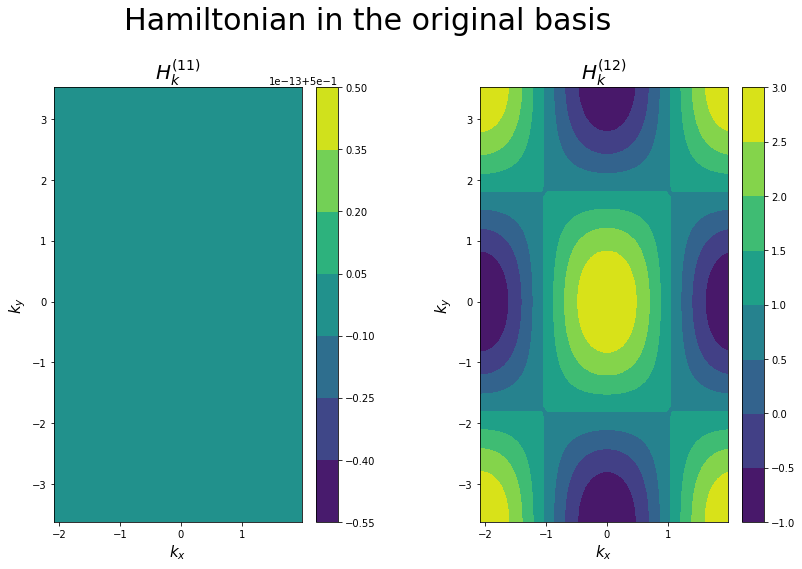

In [5]:
fig,axs = plt.subplots(1,2,figsize=(14,8))
fig.suptitle('Hamiltonian in the original basis',fontsize=30,y=1.02)
cf0 = axs[0].contourf(kx,ky,h[...,0,0].real)
cf1 = axs[1].contourf(kx,ky,h[...,0,1].real)
for ax in axs:
    ax.set_xlabel(r'$k_x$',fontsize=15)
    ax.set_ylabel(r'$k_y$',fontsize=15)
axs[0].set_aspect('equal',adjustable='box')
axs[1].set_aspect('equal',adjustable='box')
axs[0].set_title(r'$H_k^{(11)}$',fontsize=20)
axs[1].set_title(r'$H_k^{(12)}$',fontsize=20)
plt.colorbar(cf0,ax=axs[0],fraction=0.08,pad=0.04);
plt.colorbar(cf1,ax=axs[1],fraction=0.08,pad=0.04);

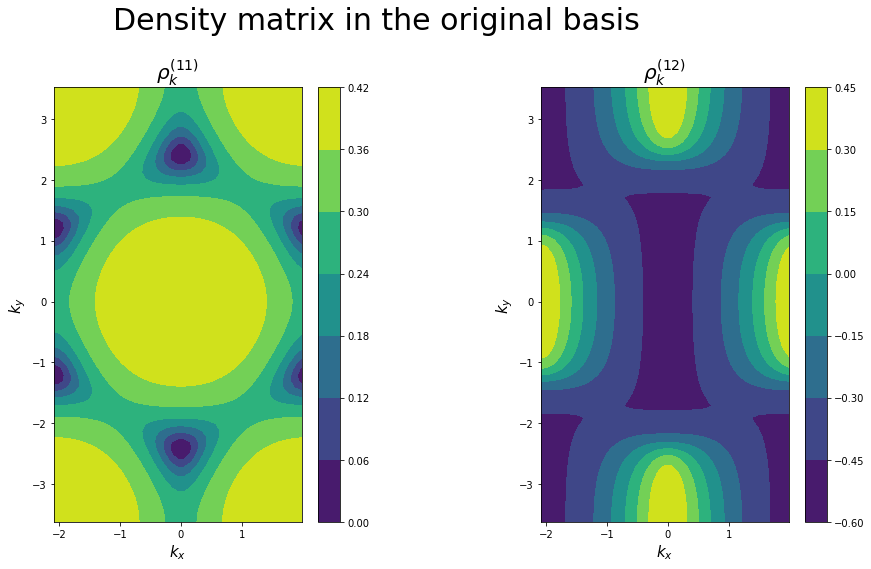

In [6]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
fig.suptitle('Density matrix in the original basis',fontsize=30,y=1.02)
cf0 = axs[0].contourf(kx,ky,rho[...,0,0].real)
cf1 = axs[1].contourf(kx,ky,rho[...,0,1].real)
for ax in axs:
    ax.set_xlabel(r'$k_x$',fontsize=15)
    ax.set_ylabel(r'$k_y$',fontsize=15)
axs[0].set_aspect('equal',adjustable='box')
axs[1].set_aspect('equal',adjustable='box')
axs[0].set_title(r'$\rho_k^{(11)}$',fontsize=20)
axs[1].set_title(r'$\rho_k^{(12)}$',fontsize=20)
plt.colorbar(cf0,ax=axs[0],fraction=0.08,pad=0.04);
plt.colorbar(cf1,ax=axs[1],fraction=0.08,pad=0.04);

## Unitary transform

In [7]:
def uk(kx,ky,m):
    theta_k = 0.5*np.arctan2(np.abs(fk(kx,ky)),m)
    phi_k = np.arctan2(fk(kx,ky).imag,fk(kx,ky).real)
    return np.einsum('ij,mn->ijmn',np.cos(theta_k),s0) \
       -1j*np.einsum('ij,mn->ijmn',np.sin(theta_k)*np.cos(phi_k),s2) \
       +1j*np.einsum('ij,mn->ijmn',np.sin(theta_k)*np.sin(phi_k),s1)

def uk_dag(kx,ky,m):
    theta_k = -0.5*np.arctan2(np.abs(fk(kx,ky)),m)
    phi_k = np.arctan2(fk(kx,ky).imag,fk(kx,ky).real)
    return np.einsum('ij,mn->ijmn',np.cos(theta_k),s0) \
       -1j*np.einsum('ij,mn->ijmn',np.sin(theta_k)*np.cos(phi_k),s2) \
       +1j*np.einsum('ij,mn->ijmn',np.sin(theta_k)*np.sin(phi_k),s1)

In [8]:
u = uk(kx,ky,m=0.5)
u_dag = uk_dag(kx,ky,m=0.5)
h_diag = np.einsum('ijkl,ijlm,ijmp->ijkp',u_dag,h,u)
rho_diag = np.einsum('ijkl,ijlm,ijmp->ijkp',u_dag,rho,u)

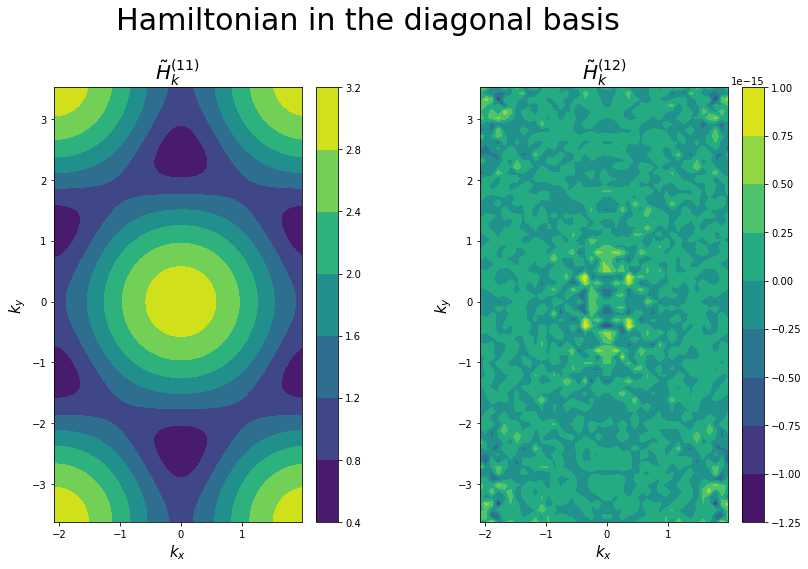

In [9]:
fig,axs = plt.subplots(1,2,figsize=(14,8))
fig.suptitle('Hamiltonian in the diagonal basis',fontsize=30,y=1.02)
cf0 = axs[0].contourf(kx,ky,h_diag[...,0,0].real)
cf1 = axs[1].contourf(kx,ky,h_diag[...,0,1].real)
for ax in axs:
    ax.set_xlabel(r'$k_x$',fontsize=15)
    ax.set_ylabel(r'$k_y$',fontsize=15)
axs[0].set_aspect('equal',adjustable='box')
axs[1].set_aspect('equal',adjustable='box')
axs[0].set_title(r'$\tilde H_k^{(11)}$',fontsize=20)
axs[1].set_title(r'$\tilde H_k^{(12)}$',fontsize=20)
plt.colorbar(cf0,ax=axs[0],fraction=0.08,pad=0.04);
plt.colorbar(cf1,ax=axs[1],fraction=0.08,pad=0.04);

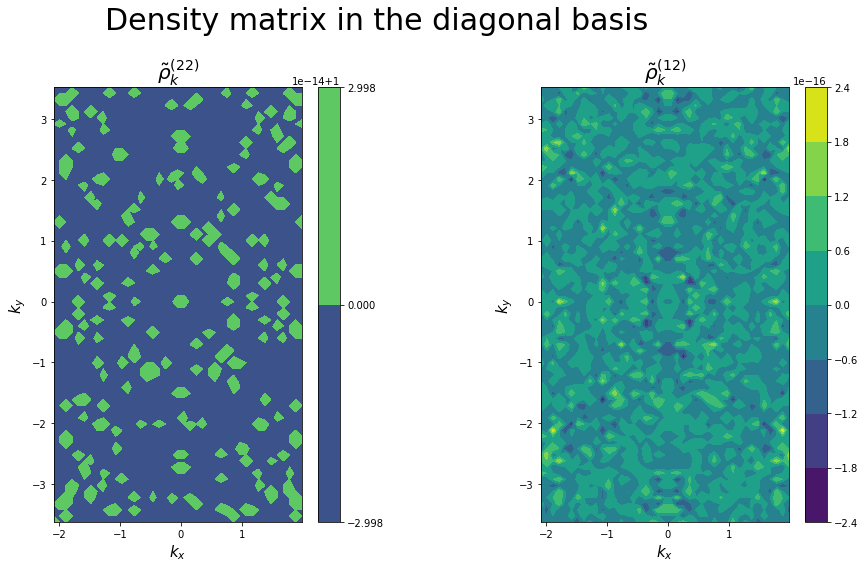

In [10]:
fig,axs = plt.subplots(1,2,figsize=(16,8))
fig.suptitle('Density matrix in the diagonal basis',fontsize=30,y=1.02)
cf0 = axs[0].contourf(kx,ky,rho_diag[...,1,1].real)
cf1 = axs[1].contourf(kx,ky,rho_diag[...,0,1].real)
for ax in axs:
    ax.set_xlabel(r'$k_x$',fontsize=15)
    ax.set_ylabel(r'$k_y$',fontsize=15)
axs[0].set_aspect('equal',adjustable='box')
axs[1].set_aspect('equal',adjustable='box')
axs[0].set_title(r'$\tilde\rho_k^{(22)}$',fontsize=20)
axs[1].set_title(r'$\tilde\rho_k^{(12)}$',fontsize=20)
plt.colorbar(cf0,ax=axs[0],fraction=0.08,pad=0.04);
plt.colorbar(cf1,ax=axs[1],fraction=0.08,pad=0.04);